In this Assignment, we will look at the programming exercises of some basic concepts of ML 1

# Binary classification with Perceptron learning algorithm 

Let’s implement one from scratch in Python!

The perceptron has three main components:

- Inputs: Each input corresponds to a feature. For example, in the case of a person, features could be age, height, weight, college degree, etc.

- Weights: Each input also has a weight which assigns a certain amount of importance to the input. If an input’s weight is large, it means this input plays a bigger role in determining the output. For example, a team’s skill level will have a bigger weight than the average age of players in determining the outcome of a match.

- Output: Finally, the perceptron uses the inputs and weights to produce an output. The type of the output varies depending on the nature of the problem. For example, to predict whether or not it’s going to rain, the output has to be binary — 1 for Yes and 0 for No. However, to predict the temperature for the next day, the range of the output has to be larger — say a number from 70 to 90.

A perceptron is trained using the **Perceptron Learning Algorithm (PLA)**. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0:** Initialize the weight vector and bias with zeros (or small random values).

**Step 1:** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:

\begin{equation}\hat{y} = \boldsymbol{X} \cdot \boldsymbol{w} + b\end{equation}

where $\boldsymbol{X}$ is a matrix of shape $(N, d)$ (data samples times number of features) that holds all training examples, and $\cdot$ denotes the dot product.

**Step 2:** Apply the sign function (or - alternatively - the Heaviside function), which returns binary values:\\

$$
    \theta(\hat{y}) \begin{cases} +1 & \text{if } \hat{y} \geq 0 \\ -1 & \text{otherwise} \end{cases}
$$

**Step 3:** Compute the weight updates using the perceptron learning rule

\begin{equation}
\Delta \boldsymbol{w} = \eta\boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)
\end{equation}

$$ \Delta b = \eta \, \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big) $$

where $\eta$ is the learning rate. 

(Note that if we simply treat the *bias* $b$ as the $0^{th}$ weight $w_0$ and add a constant $1$ before the input $x$, then the notation simplifies to
$$
\boldsymbol{y} = \theta(\boldsymbol{X} \cdot \boldsymbol{w} )
$$
)

**Step 4:** Update the weights and bias

\begin{equation}
\boldsymbol{w} = \boldsymbol{w} + \Delta \boldsymbol{w}
\end{equation}

$$
b = b  + \Delta b
$$




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

### Dataset

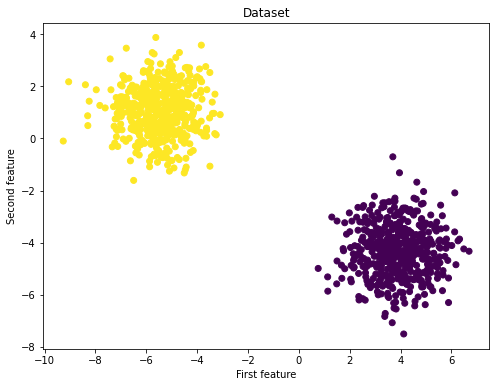

In [2]:
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()


In [3]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


### Exercise 1.1

Create a Perceptron model class using the above mentioned steps. Train the model with `X_train` and `y_train`. Predict the labels of `X_test` in `y_pred` and test the accuracy of the model using `y_test`.

In [4]:
# ENTER YOUR CODE HERE
class Perceptron():
  def __init__(self):
    pass

  def train(self, X, y, learning_rate=0.05, n_iters=100):
    N, d = X.shape

    # Step 0: Initialize the parameters
    self.weights = np.zeros((d,1))
    self.bias = 0

    for i in range(n_iters):
      # Step 1: Compute the activation
      y_hat = np.dot(X, self.weights) + self.bias

      # Step 2: Compute the output
      theta = self.step_function(y_hat)

      # Step 3: Compute weight updates
      delta_w = learning_rate * np.dot(X.T, (y - theta))
      delta_b = learning_rate * np.sum(y - theta)

      # Step 4: Update the parameters
      self.weights += delta_w
      self.bias += delta_b
    
    return self.weights, self.bias

  def step_function(self, x):
    return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

  def predict(self, X):
    a = np.dot(X, self.weights) + self.bias
    return self.step_function(a)

perc = Perceptron()
w_train, b_train = perc.train(X_train, y_train, n_iters=500)

y_pred = perc.predict(X_test)
print(f"test accuracy: {100 - np.mean(np.abs(y_pred - y_test)) * 100}%")



test accuracy: 100.0%


### Visualizing the decision boundary

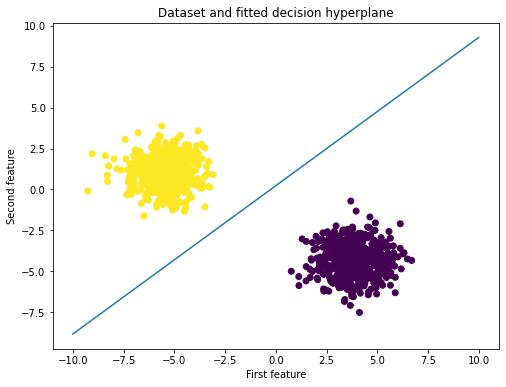

In [5]:
def plot_hyperplane(X, y, weights, bias):
  """
  Plots the dataset and the estimated decision hyperplane
  """
  slope = - weights[0]/weights[1]
  intercept = - bias/weights[1]
  x_hyperplane = np.linspace(-10,10,10)
  y_hyperplane = slope * x_hyperplane + intercept
  fig = plt.figure(figsize=(8,6))
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.plot(x_hyperplane, y_hyperplane, '-')
  plt.title("Dataset and fitted decision hyperplane")
  plt.xlabel("First feature")
  plt.ylabel("Second feature")
  plt.show()

plot_hyperplane(X, y, w_train, b_train)

### Exercise 1.2

After implementing Perceptron from scratch, let's fit the same dataset in the [`Perceptron`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) model from `Scikit-learn` library.

In [6]:
from sklearn.linear_model import Perceptron

# ENTER YOUR CODE HERE
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

# Linear regression with Pseudo inverse 

In linear regression, we want to model the relationship between a scalar (or vector-valued) dependent variable `y` and one or more independent variables `x`.

We assume that the dataset was produced by some unknown function $f$ which maps features $\pmb{x}$ to labels $y$. Our goal is to learn the underlying function $f$ such that we can predict function values at new input locations. In linear regression, we model $f$ using a *linear combination* of the input features:

$$
{y}^{(i)} = b + w_1 x_1^{(i)} + w_2 x_2^{(i)} + ... + w_d x_d^{(i)}
= \sum_{j=1}^{d} b + w_j x_j^{(i)}
= \pmb{w}^T \pmb{x}^{(i)} + b
$$

Note that this is simply the perceptron without the nonlinear function. The output is thus **continuous** and **unbounded**.

### Training

A linear regression is typically trained using the (mean) squared error (MSE) as a loss function. This computes a [least squares](https://en.wikipedia.org/wiki/Least_squares) solution. The mean squared error minimizes the sum of squared residuals (= difference between true label $y$ and the model prediction $\hat{y}$):

$$
E(\boldsymbol{w},b) = \frac{1}{m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2
$$

Why do we use the squared error as a loss function? In short, using the MSE corresponds to computing a maximum likelihood solution to our problem. In addition, the optimization problem is quadratic and convex, which makes it very easy to solve by solving a linear system.
For a more detailed explanation [look here](https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error).

With the MSE at hand, a linear regression model can be trained by simply solving the normal equation (closed-form solution) also known as the pseudo inverse: 
$$
\boldsymbol{w} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}
$$ 
where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

### Dataset

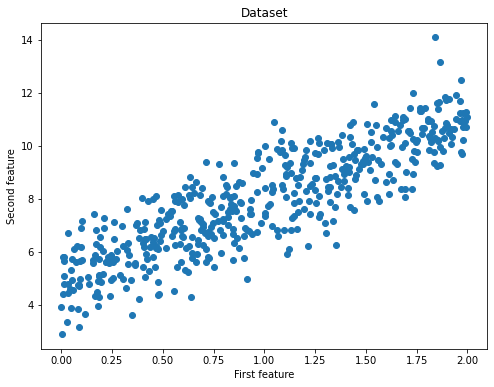

In [8]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [9]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


### Exercise 1.3

Create a Linear regression class using the above mentioned steps. Train the model with gradient descent and normal equation (use the formula and steps above) using `X_train` and `y_train`. Test the gradient descent model and the normal equation model using `X_test`.

Error on training set: 1.0228
Error on test set: 1.0432


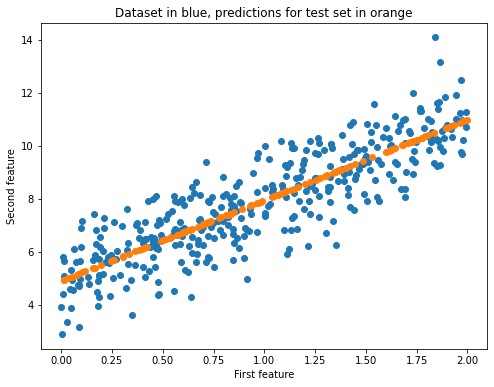

In [10]:
# ENTER YOUR CODE HERE
class LinearRegression:
    
  def __init__(self):
    pass

  def train_normal_equation(self, X, y):
    """
    Trains a linear regression model using the normal equation
    """
    self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    self.bias = 0
    
    return self.weights, self.bias

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

m_samples, _ = X_train.shape
m_samples_test, _ = X_test.shape

# Training with normal equation
# To compute the parameters using the normal equation, we add a bias value of 1 to each input example
X_b_train = np.c_[np.ones((m_samples)), X_train]
X_b_test = np.c_[np.ones((m_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)

# Testing (normal equation model)
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train =  (1 / m_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / m_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

# Plot the test predictions
fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### Exercise 1.4

After implementing Logistic Regression from scratch, let's fit the same dataset in the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) class from `Scikit-learn` library.

0.7467716922603624
[[3.04765639]]
[4.89841498]


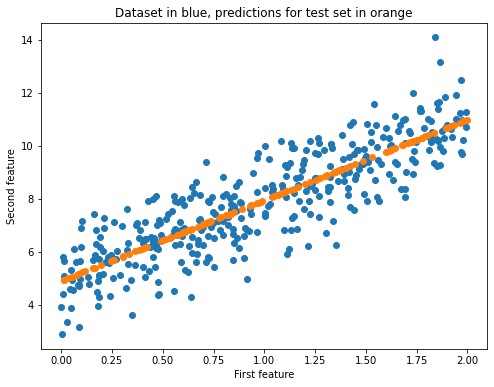

In [11]:
from sklearn.linear_model import LinearRegression

# ENTER YOUR CODE HERE
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test, y_test))
print(reg.coef_)
print(reg.intercept_)

# Plot the test predictions
fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

# Logistic regression + gradient descent 

Logistic regression is somewhere in between binary classification and regression in the sense that we have a continuous output, but it is bounded between 0 and 1. Conceptually, we are trying to model the probabilistic outcome of a **binary variable** given a **linear combination of input features**. For example, we could try to predict the outcome of an election (win/lose) using information about how much money a candidate spent campaigning, how much time she/he spent campaigning, etc.

### Model

Logistic regression works as follows.

**Given:**
- dataset $D=\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}\in\mathbb{R}^d$ being a $d-$dimensional vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{0,1\}$

The logistic regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w_1, ..., w_d)$
- it has a real-valued bias $b$
- it uses a sigmoid function as its activation function.

### Training

Different to linear regression, logistic regression has no closed form solution. But the cost function is convex, so we can train the model using gradient descent. In fact, **gradient descent** (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is small enough and enough training iterations are used). 

Training a logistic regression model has different steps. In the beginning (step 0) the parameters are initialized. The other steps are repeated for a specified number of training iterations or until convergence of the parameters.

**Step 0:** Initialize the weight vector and bias with zeros (or small random values).

**Step 1:** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:

$$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b $$

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.

**Step 2:** Apply the sigmoid activation function, which returns values between `0` and `1`:

$$\boldsymbol{y} = \sigma(\boldsymbol{a}) = \frac{1}{1 + \exp(-\boldsymbol{a})}$$

**Step 3:** Compute the cost over the whole training set. We want to model the probability of the target values being `0` or `1`. So during training we want to adapt our parameters such that our model outputs high values for examples with a positive label (true label being `1`) and small values for examples with a negative label (true label being `0`). This is reflected in the cost function:

$$E(\boldsymbol{w},b) = \frac{1}{N} \sum_{i=1}^N \log \left(1 + e^{-y^{(i)} \boldsymbol{w}^\top \boldsymbol{x}^{(i)}}\right)$$

**Step 4:** Compute the gradient of the cost function with respect to the weight vector and bias. A detailed explanation of this derivation can be found [here](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated).

The general formula is given by:
$$\frac{\partial E}{\partial w_j} = -\frac{1}{N}\sum_{i=1}^N \frac{y^{(i)} \boldsymbol{x}^{(i)}}{1 + e^{-y^{(i)} \boldsymbol{w}^\top \boldsymbol{x}^{(i)}}}$$

For the bias, the inputs $x_j^{(i)}$ will be given `1`.

**Step 5:** Update the weights and bias
$$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w E$$
$$b = b - \eta \, \nabla_b E$$
where $\eta$ is the learning rate.

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

### Dataset

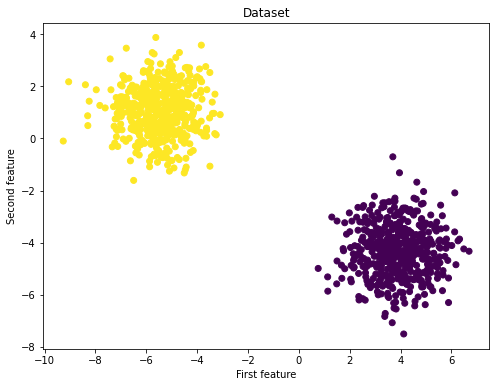

In [13]:
# We will perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [14]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


### Exercise 1.5

Create a Logistic regression class using the above mentioned steps. Train the model (use the formula and steps above) using `X_train` and `y_train`. Test the model using `X_test`.

Cost after iteration 0: 0.581567427203814
Cost after iteration 100: 0.49967358724851174
Cost after iteration 200: 0.49965884304271424
Cost after iteration 300: 0.49965883611057643
Cost after iteration 400: 0.49965883610403616
Cost after iteration 500: 0.49965883610402806


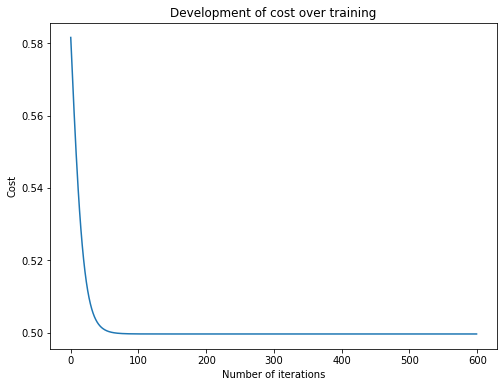

train accuracy: 100.0%
test accuracy: 100.0%


In [15]:
# ENTER YOUR CODE HERE
class LogisticRegression:
    
  def __init__(self):
    pass

  def sigmoid(self, a):
    return 1 / (1 + np.exp(-a))

  def train(self, X, y_true, n_iters, learning_rate):
    """
    Trains the logistic regression model on given data X and targets y
    """
    # Step 0: Initialize the parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros((n_features, 1))
    self.bias = 0
    costs = []
    
    for i in range(n_iters):
      # Step 1 and 2: Compute a linear combination of the input features and weights, 
      # apply the sigmoid activation function
      y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
      
      # Step 3: Compute the cost over the whole training set.
      cost = (1 / n_samples) * np.sum(np.log( 1 + np.exp(-y_true * y_predict)))

      # Step 4: Compute the gradients
      dw = (- 1 / n_samples) * np.dot(X.T, y_true / (1 + np.exp(-y_true * y_predict)))
      db = (- 1 / n_samples) * np.sum(y_true / (1 + np.exp(-y_true * y_predict)))

      # Step 5: Update the parameters
      self.weights = self.weights - learning_rate * dw
      self.bias = self.bias - learning_rate * db

      costs.append(cost)
      if i % 100 == 0:
        print(f"Cost after iteration {i}: {cost}")

    return self.weights, self.bias, costs

  def predict(self, X):
    """
    Predicts binary labels for a set of examples X.
    """
    y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
    y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

    pred_label = np.array(y_predict_labels)[:, np.newaxis]

    return pred_label 

# Training 
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(costs)), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

# Testing (gradient descent model)
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

### Exercise 1.6

After implementing Logistic Regression from scratch, let's fit the same dataset in the [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) class from `Scikit-learn` library.

In [16]:
from sklearn.linear_model import LogisticRegression

# ENTER YOUR CODE HERE
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

# Support Vector Machines (SVM)
## What are support vector machines?

Support vector machines (short: SVMs) are supervised machine learning models. They are the most prominent member of the class of [*kernel methods*](https://en.wikipedia.org/wiki/Kernel_method). SVMs can be used both for classification and regression.

Assume we are given a dataset $D=\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(N)}, y^{(N)})\}$, where $\boldsymbol{x}^{(i)} \in \mathbb{R}^d$ and labels $y^{(i)} \in \{-1, +1 \}$. A linear (hard-margin) SVM separates the two classes using a ($d-1$ dimensional) hyperplane.

Special to SVMs is that they use not any hyperplane but the one that maximizes the distance between itself and the two sets of datapoints. Such a hyperplane is called *maximum-margin* hyperplane:

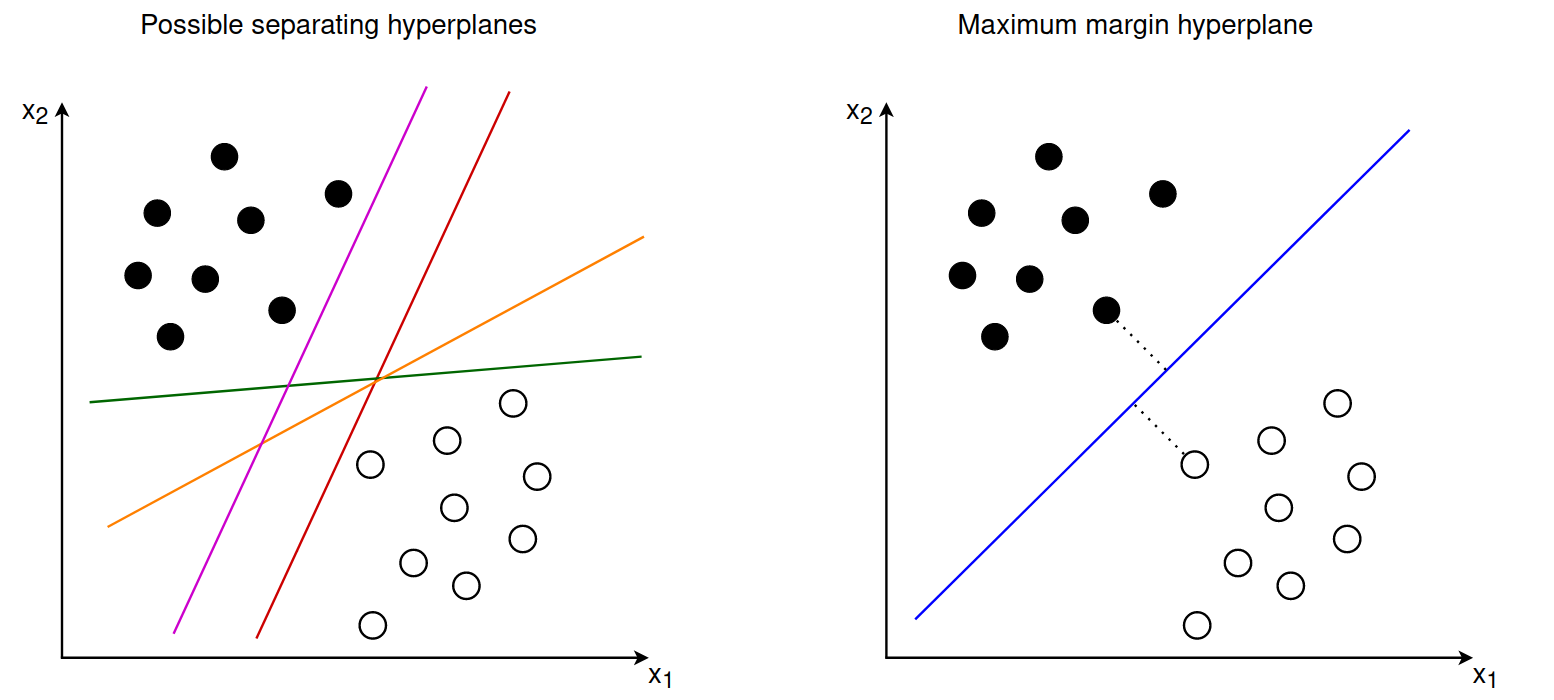

In case you have never heard the term margin: the margin describes the distance between the hyperplane and the closest examples in the dataset.

Two types of SVMs exist: primals SVMs and dual SVMs. Although most research in the past looked into dual SVMs both can be used to perform non-linear classification.

In the cell below we create a simple dataset with two features and labels +1 and -1. We further split the dataset into a test and train set.

In [17]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

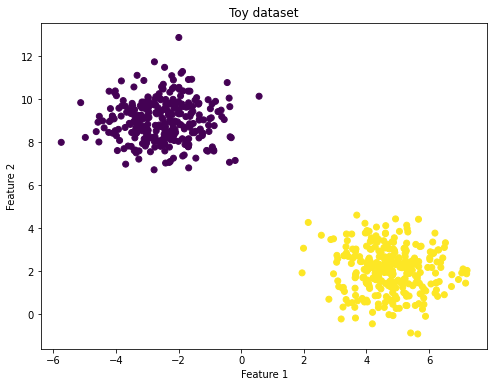

In [18]:
data_features, data_targets = make_blobs(n_samples=600, centers=2, n_features=2, random_state=42)

# The function outputs targets 0 and 1 so we need to convert targets 0 to -1
transformed_data_targets = [-1 if t == 0 else +1 for t in data_targets]
        
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data_features[:, 0], data_features[:, 1], c = transformed_data_targets)
plt.title("Toy dataset")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")
plt.show()

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(data_features, transformed_data_targets, test_size = 0.3)

### Exercise 1.7

In this exercise, you have to fit the training example in an [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC) classifier from `Scikit-learn` library and evaluate on the testing examples.

In [19]:
import numpy as np
from sklearn.svm import SVC
#ENTER YOUR CODE HERE
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [20]:
# Predict lables for unknown test samples
from sklearn.metrics import accuracy_score, recall_score, precision_score

predicted_labels = svm.predict(X_test)
predicted_labels = predicted_labels.flatten()

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, predicted_labels)))
print("Recall on test dataset: {}".format(recall_score(y_test, predicted_labels)))
print("Precision on test dataset: {}".format(precision_score(y_test, predicted_labels)))    

Accuracy on test dataset: 1.0
Recall on test dataset: 1.0
Precision on test dataset: 1.0


### Visualizing the decision boundary

Given our trained model we can visualize the decision boundary, as done below.

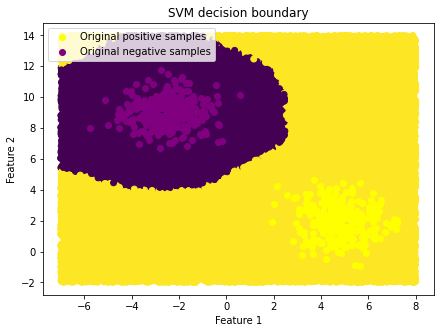

In [21]:
import numpy as np

# Create dataset for visualization
size=40000
feat_1 = np.random.uniform(low=-7, high=8, size=size)
feat_2 = np.random.uniform(low=-2, high=14, size=size)
features_vis = np.column_stack((feat_1, feat_2))

labels_vis = svm.predict(features_vis)

# Plot the decision boundary
plt.figure(figsize=(7, 5))
plt.scatter(features_vis[:, 0], features_vis[:, 1], c = labels_vis)
# Plot original dataset
positive_samples = [idx for idx in range(len(transformed_data_targets)) if transformed_data_targets[idx] == +1]
negative_samples = [idx for idx in range(len(transformed_data_targets)) if transformed_data_targets[idx] == -1]
plt.scatter(data_features[positive_samples, 0],
            data_features[positive_samples, 1],
            c="yellow", label="Original positive samples")
plt.scatter(data_features[negative_samples, 0],
            data_features[negative_samples, 1],
            c="purple", label="Original negative samples")
plt.title("SVM decision boundary")
plt.ylabel("Feature 2")
plt.xlabel("Feature 1")
plt.legend(loc=2)
plt.show()

##Sources and further reading <a class="anchor" id="sources"></a>

The basis for this notebook is chapter 12 of the book [Mathematics for Machine Learning](https://mml-book.github.io/). I can highly recommend to read through the entire chapter to get a deeper understanding of support vector machines.

Another source I liked very much is [this MIT lecture on SVMs](https://www.youtube.com/watch?v=_PwhiWxHK8o).